# Compsci 571 HW4 Question 4
## SVM Implementation

Yilin Gao (yg95)

Python 3.6

In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

from svm_classifier import SVMClassifier

In [2]:
data = np.genfromtxt('creditCard.csv', delimiter=',', skip_header=1)
n = data.shape[0]
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

(1319, 9) (1319,)


In [3]:
np.random.seed(2018)
train_idx = np.random.choice(n, int(n * 0.9), replace = False)
test_idx = np.array(list(set(range(n)) - set(train_idx)))
X_train, y_train = X[train_idx, :], y[train_idx]
X_test, y_test = X[test_idx, :], y[test_idx]

In [4]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

In [5]:
linear_svm_classifier = SVMClassifier(linear_kernel)

In [6]:
linear_svm_classifier.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -2.7000e+02 -5.4000e+02  2e+03  3e+01  2e+00
 1: -1.2210e+03 -1.2332e+03  1e+03  2e+01  1e+00
 2: -1.3713e+05 -1.3714e+05  1e+03  2e+01  1e+00
 3: -1.3592e+09 -1.3592e+09  2e+03  2e+01  1e+00
 4: -1.3456e+15 -1.3456e+15  1e+07  2e+01  1e+00
 5: -1.3321e+23 -1.3321e+23  1e+13  1e+06  1e+00
 6: -1.3188e+33 -1.3188e+33  1e+21  6e+14  1e+00
 7: -1.3055e+45 -1.3055e+45  1e+31  3e+28  1e+00
 8: -1.2875e+59 -1.2875e+59  1e+43  1e+42  1e+00
 9: -4.6187e+74 -4.6187e+74  5e+56  2e+01  1e+00
10: -3.2682e+91 -3.2682e+91  3e+71  2e+01  1e+00
11: -7.6956e+107 -7.6956e+107  8e+85  8e+90  1e+00
12: -4.7083e+124 -4.7083e+124  5e+100 6e+107  1e+00
13: -1.6372e+136 -1.6372e+136  2e+112  2e+01  1e+00
14: -1.6208e+184 -9.4694e+191  9e+191    inf  3e+07
15: -1.6208e+184 -9.4694e+189  9e+189    inf  3e+05
16: -1.6208e+184 -9.4694e+189  9e+189    inf  3e+05
17: -1.6208e+184 -9.4694e+189  9e+189    inf  3e+05
18: -1.6208e+184 -9.4694e+189  9e+189    inf  3e+0

In [7]:
print(linear_svm_classifier.lambda_zero)
print(linear_svm_classifier.lambdas)

[-2.28657313]
[[2.74040186e-04 6.05516276e-02 6.06248044e-03 1.02778265e-03
  1.40497728e-04 1.63412127e-03 1.93959735e-01 1.44791141e-03
  1.65478191e-02]]


In [8]:
y_hat = linear_svm_classifier.predict(X_test)

In [9]:
accu_linear = metrics.accuracy_score(y_test, y_hat)
auc_linear = metrics.roc_auc_score(y_test, y_hat)
fpr_linear, tpr_linear, thresholds_linear = metrics.roc_curve(y_test, y_hat, pos_label=1)

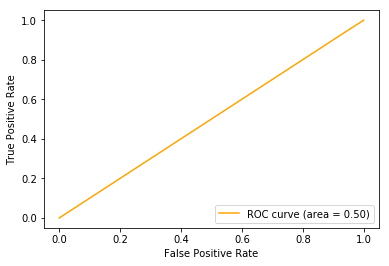

In [10]:
plt.plot(fpr_linear, tpr_linear, color='orange', label='ROC curve (area = %0.2f)' % auc_linear)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [11]:
def radial_kernel_5(x1, x2):
    return np.exp(-1 * np.linalg.norm(x1 - x2, 2) ** 2 / 5)

In [12]:
radial5_svm_classifier = SVMClassifier(radial_kernel_5)

In [13]:
radial5_svm_classifier.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -2.7000e+02 -5.4000e+02  2e+03  3e+01  2e+00
 1: -1.2210e+03 -1.2332e+03  1e+03  2e+01  1e+00
 2: -1.3713e+05 -1.3714e+05  1e+03  2e+01  1e+00
 3: -1.3592e+09 -1.3592e+09  2e+03  2e+01  1e+00
 4: -1.3456e+15 -1.3456e+15  1e+07  2e+01  1e+00
 5: -1.3321e+23 -1.3321e+23  1e+13  2e+06  1e+00
 6: -1.3188e+33 -1.3188e+33  1e+21  2e+16  1e+00
 7: -1.3056e+45 -1.3056e+45  1e+31  2e+28  1e+00
 8: -1.2864e+59 -1.2864e+59  1e+43  3e+42  1e+00
 9: -6.9169e+74 -6.9169e+74  7e+56  6e+57  1e+00
10: -5.3205e+91 -5.3205e+91  5e+71  5e+74  1e+00
11: -2.8756e+107 -2.8756e+107  3e+85  1e+89  1e+00
12: -2.8468e+151 -9.6383e+155  1e+156 7e+134  2e+04
13: -2.8470e+151 -9.6671e+153  1e+154 4e+134  2e+02
14: -2.8636e+151 -1.2559e+152  1e+152  2e-05  2e+00
15: -4.3474e+151 -4.4946e+151  1e+150  5e-06  5e-01
16: -1.3564e+153 -1.3568e+153  5e+149 1e+136  5e-01
17: -3.9690e+156 -3.9691e+156  1e+151  4e-06  5e-01
18: -1.1606e+162 -1.1606e+162  4e+154  4e-06  5e-0

In [15]:
y_hat_radial5 = radial5_svm_classifier.predict(X_test)

In [24]:
accu_radial5 = metrics.accuracy_score(y_test, y_hat)
auc_radial5 = metrics.roc_auc_score(y_test, y_hat)
fpr_radial5, tpr_radial5, thresholds_radial5 = metrics.roc_curve(y_test, y_hat_radial5, pos_label=1)

In [25]:
print(fpr_radial5, tpr_radial5)

[0. 1.] [0. 1.]


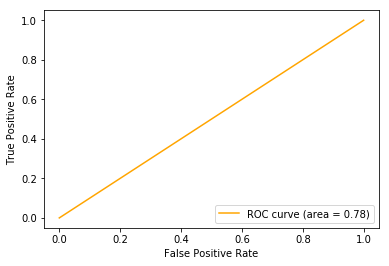

In [26]:
plt.plot(fpr_radial5, tpr_radial5, color='orange', label='ROC curve (area = %0.2f)' % accu_radial5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [19]:
def radial_kernel_25(x1, x2):
    return np.exp(-1 * np.linalg.norm(x1 - x2, 2) ** 2 / 25)

In [20]:
radial25_svm_classifier = SVMClassifier(radial_kernel_25)

In [22]:
radial25_svm_classifier.train(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -2.7000e+02 -5.4000e+02  2e+03  3e+01  2e+00
 1: -1.2210e+03 -1.2332e+03  1e+03  2e+01  1e+00
 2: -1.3713e+05 -1.3714e+05  1e+03  2e+01  1e+00
 3: -1.3592e+09 -1.3592e+09  2e+03  2e+01  1e+00
 4: -1.3456e+15 -1.3456e+15  1e+07  2e+01  1e+00
 5: -1.3321e+23 -1.3321e+23  1e+13  2e+06  1e+00
 6: -1.3188e+33 -1.3188e+33  1e+21  2e+16  1e+00
 7: -1.3056e+45 -1.3056e+45  1e+31  2e+28  1e+00
 8: -1.2864e+59 -1.2864e+59  1e+43  3e+42  1e+00
 9: -6.9169e+74 -6.9169e+74  7e+56  6e+57  1e+00
10: -5.3205e+91 -5.3205e+91  5e+71  5e+74  1e+00
11: -2.8756e+107 -2.8756e+107  3e+85  1e+89  1e+00
12: -2.8468e+151 -9.6383e+155  1e+156 7e+134  2e+04
13: -2.8470e+151 -9.6671e+153  1e+154 4e+134  2e+02
14: -2.8636e+151 -1.2559e+152  1e+152  2e-05  2e+00
15: -4.3474e+151 -4.4946e+151  1e+150  5e-06  5e-01
16: -1.3564e+153 -1.3568e+153  5e+149 1e+136  5e-01
17: -3.9690e+156 -3.9691e+156  1e+151  4e-06  5e-01
18: -1.1606e+162 -1.1606e+162  4e+154  4e-06  5e-0

In [23]:
y_hat_radial25 = radial25_svm_classifier.predict(X_test)

In [27]:
accu_radial25 = metrics.accuracy_score(y_test, y_hat)
auc_radial25 = metrics.roc_auc_score(y_test, y_hat)
fpr_radial25, tpr_radial25, thresholds_radial25 = metrics.roc_curve(y_test, y_hat_radial25, pos_label=1)

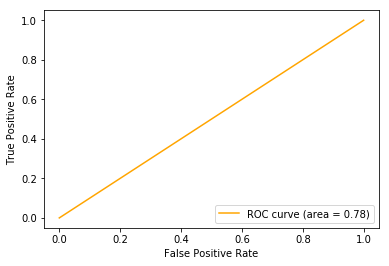

In [28]:
plt.plot(fpr_radial25, tpr_radial25, color='orange', label='ROC curve (area = %0.2f)' % accu_radial25)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()